'''<br>
<br>

@Author: Shivraj Yelave<br>
@Date: 1-10-24<br>
@Last modified by: Shivraj Yelave<br>
@Last modified time: <br>
@Title: Logistic Regression task 1
<br>
<br>


'''

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


### Loading Dataset

In [3]:
# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')  


### Analysis Dataset

In [4]:
# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


### Visualize Dataset

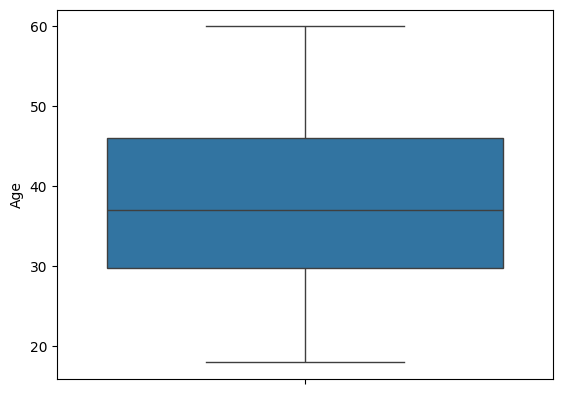

<Axes: ylabel='EstimatedSalary'>

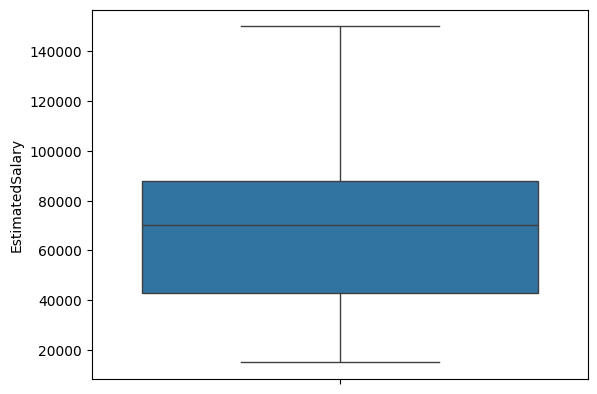

In [5]:


sns.boxplot(data['Age'])
plt.show()
sns.boxplot(data['EstimatedSalary'])



### Spliting Dataset

In [6]:
# Select features and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Scalling Columns

In [7]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


### Model selection

In [8]:
# Create an instance of the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LogisticRegression()

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

### Model Performance

In [10]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[50  2]
 [ 9 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



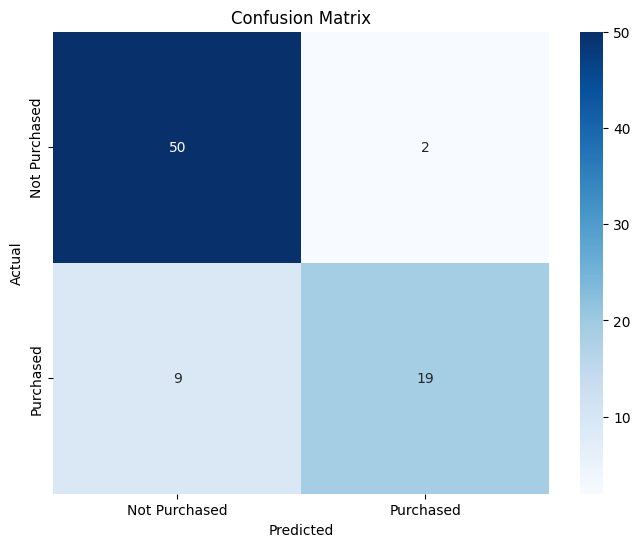

In [11]:
# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


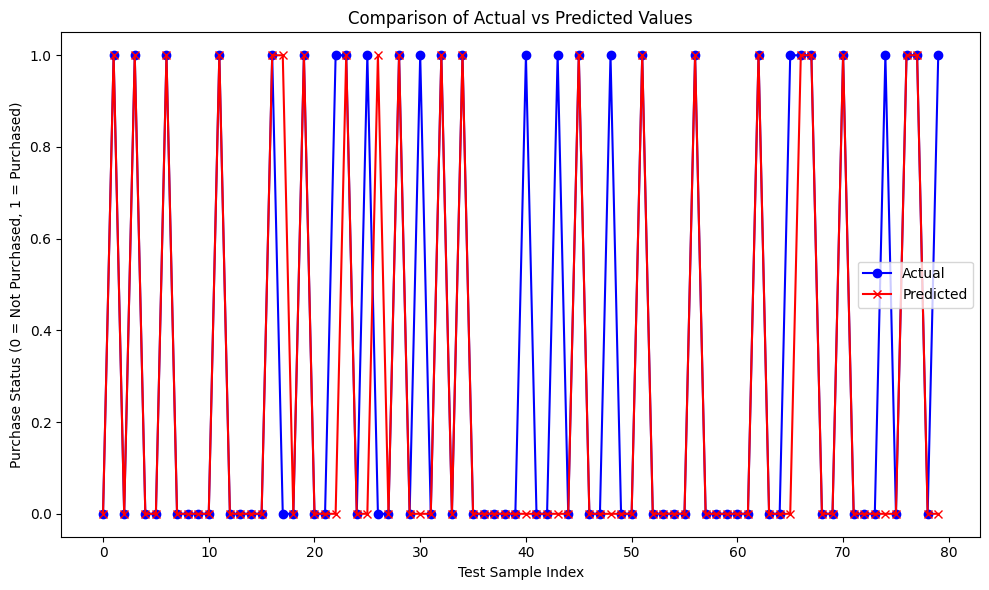

In [12]:


# Create a range for the x-axis (for each data point)
x_range = range(len(y_test))

plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(x_range, y_test, label='Actual', marker='o', color='blue')

# Plot predicted values
plt.plot(x_range, y_pred, label='Predicted', marker='x', color='red')

# Add labels and title
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Test Sample Index')
plt.ylabel('Purchase Status (0 = Not Purchased, 1 = Purchased)')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
